In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from models.baseline_test import BaselineModels

# Load test data
data = pd.read_csv('data/for_test.csv')
print("Data loaded successfully!")
print(f"Data shape: {data.shape}")
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")

# Initialize baseline model tester
baseline_tester = BaselineModels(data, date_col='Date', target_col='Sales')
print("\nBaseline tester initialized!")

Data loaded successfully!
Data shape: (1460, 2)
Date range: 1981-01-01 to 1984-12-30

Baseline tester initialized!



TESTING HORIZON t+1
last_day: 21.0409% WMAPE
last_week: 28.3566% WMAPE
last_year: 30.0402% WMAPE

Best baseline for t+1: last_day (21.0409% WMAPE)

Visualization: Single prediction example for t+1


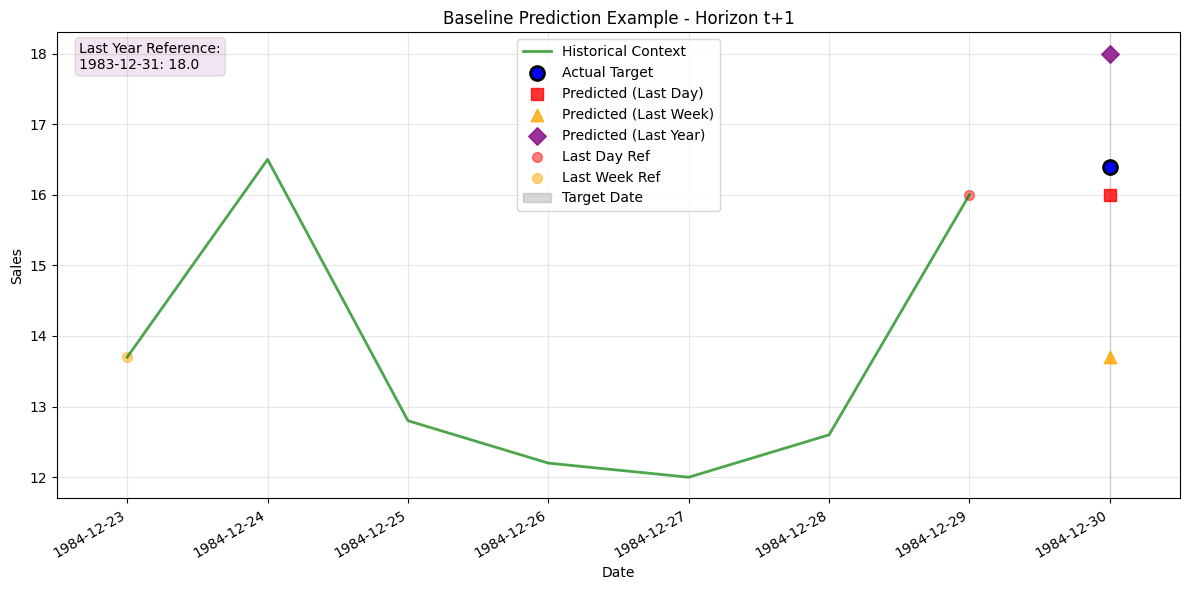

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Baseline Prediction Example - Horizon t+1'}, xlabel='Date', ylabel='Sales'>)

In [2]:
# Test for horizon t+1
print("\n" + "="*50)
print("TESTING HORIZON t+1")
print("="*50)

results_h1 = baseline_tester.evaluate_all_baselines(horizon=1)

for model_name, wmape_score in results_h1.items():
    print(f"{model_name}: {wmape_score:.4f}% WMAPE")

# Find best model for t+1
best_model_h1 = min(results_h1, key=results_h1.get)
print(f"\nBest baseline for t+1: {best_model_h1} ({results_h1[best_model_h1]:.4f}% WMAPE)")

# Plot single prediction example for t+1
print("\nVisualization: Single prediction example for t+1")
baseline_tester.plot_single_prediction_point(horizon=1)


TESTING HORIZON t+1,t+2
last_day: 24.0886% WMAPE
last_week: 28.3734% WMAPE
last_year: 30.0602% WMAPE

Best baseline for t+1,t+2: last_day (24.0886% WMAPE)

Visualization: Single prediction example for t+1,t+2


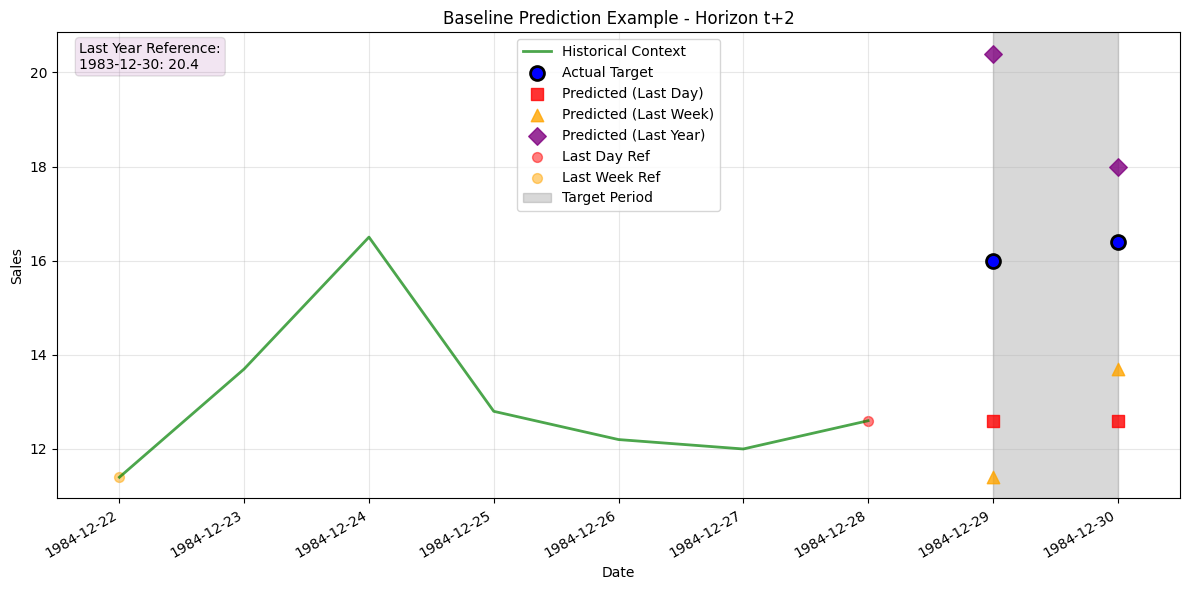

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Baseline Prediction Example - Horizon t+2'}, xlabel='Date', ylabel='Sales'>)

In [3]:
# Test for horizon t+2  
print("\n" + "="*50)
print("TESTING HORIZON t+1,t+2")
print("="*50)

results_h2 = baseline_tester.evaluate_all_baselines(horizon=2)

for model_name, wmape_score in results_h2.items():
    print(f"{model_name}: {wmape_score:.4f}% WMAPE")

# Find best model for t+2
best_model_h2 = min(results_h2, key=results_h2.get)
print(f"\nBest baseline for t+1,t+2: {best_model_h2} ({results_h2[best_model_h2]:.4f}% WMAPE)")

# Plot single prediction example for t+2
print("\nVisualization: Single prediction example for t+1,t+2")
baseline_tester.plot_single_prediction_point(horizon=2)


Performance comparison:


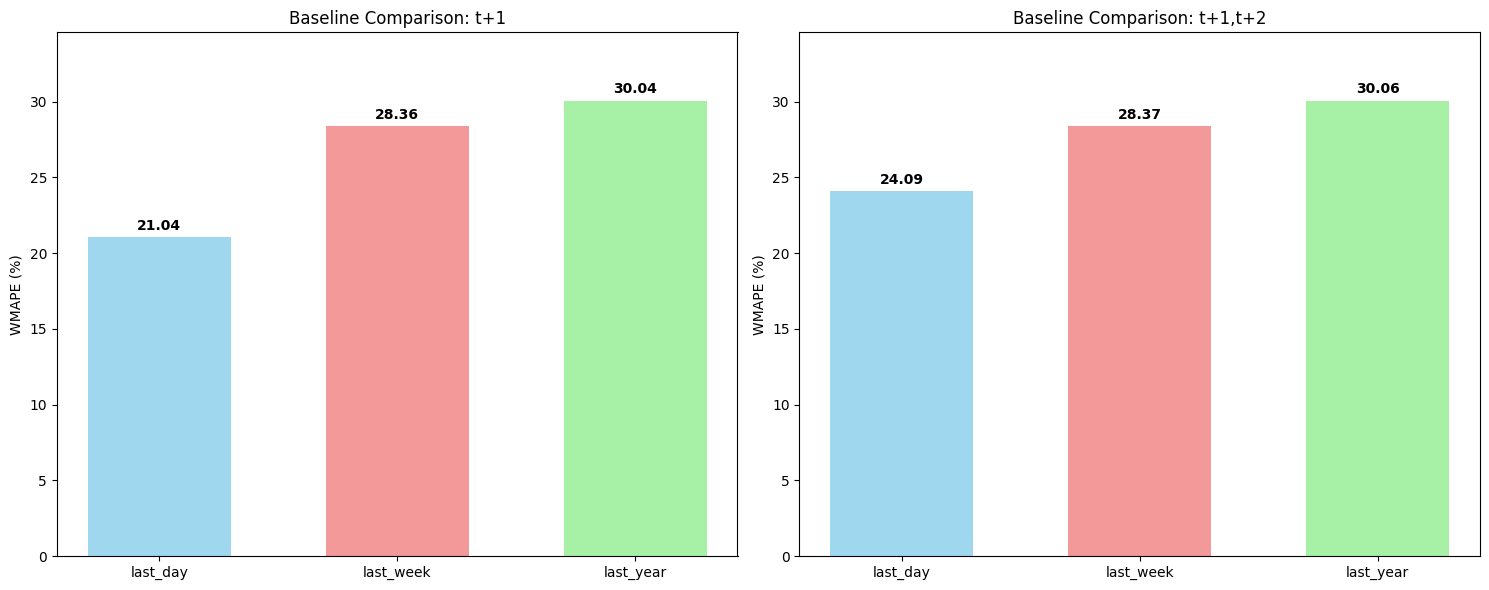

In [4]:
# Performance comparison bar chart
print("\nPerformance comparison:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot t+1
models = list(results_h1.keys())
scores_h1 = list(results_h1.values())
bars1 = ax1.bar(models, scores_h1, width=0.6, alpha=0.8, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Baseline Comparison: t+1')
ax1.set_ylabel('WMAPE (%)')
ax1.set_ylim(0, max(max(scores_h1), max(results_h2.values())) * 1.15)

for i, score in enumerate(scores_h1):
    ax1.text(i, score + max(scores_h1) * 0.01, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot t+1,t+2
scores_h2 = list(results_h2.values())
bars2 = ax2.bar(models, scores_h2, width=0.6, alpha=0.8, color=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Baseline Comparison: t+1,t+2')
ax2.set_ylabel('WMAPE (%)')
ax2.set_ylim(0, max(max(scores_h1), max(results_h2.values())) * 1.15)

for i, score in enumerate(scores_h2):
    ax2.text(i, score + max(scores_h2) * 0.01, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
# Final summary
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)

print(f"Best baseline for t+1: {best_model_h1} ({results_h1[best_model_h1]:.4f}% WMAPE)")
print(f"Best baseline for t+1,t+2: {best_model_h2} ({results_h2[best_model_h2]:.4f}% WMAPE)")

print("\nBaseline testing completed!")
print(f"Recommended baseline model: {best_model_h1}")

# Performance summary table
print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)
print("Model Performance (WMAPE %):")
print("-" * 30)
for model in ['last_day', 'last_week', 'last_year']:
    print(f"{model:12} | t+1: {results_h1[model]:6.2f}% | t+1,t+2: {results_h2[model]:6.2f}%")
print("-" * 30)
print(f"{'BEST':12} | t+1: {results_h1[best_model_h1]:6.2f}% | t+1,t+2: {results_h2[best_model_h2]:6.2f}%")


FINAL SUMMARY
Best baseline for t+1: last_day (21.0409% WMAPE)
Best baseline for t+1,t+2: last_day (24.0886% WMAPE)

Baseline testing completed!
Recommended baseline model: last_day

PERFORMANCE SUMMARY
Model Performance (WMAPE %):
------------------------------
last_day     | t+1:  21.04% | t+1,t+2:  24.09%
last_week    | t+1:  28.36% | t+1,t+2:  28.37%
last_year    | t+1:  30.04% | t+1,t+2:  30.06%
------------------------------
BEST         | t+1:  21.04% | t+1,t+2:  24.09%
